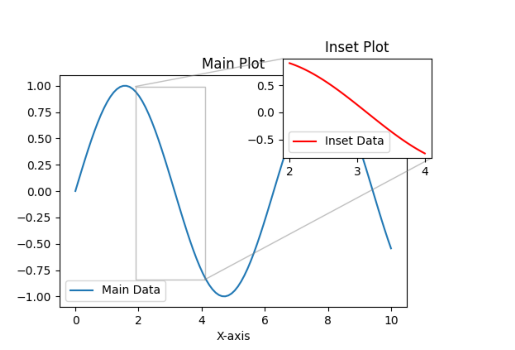

In [9]:
import matplotlib.figure as figure
import matplotlib.backends.backend_agg as agg
import numpy as np
import matplotlib.pyplot as plt

# Create a figure
fig = figure.Figure(figsize=(6, 4))
canvas = agg.FigureCanvasAgg(fig)

# Add main axes
main_ax = fig.add_axes([0.1, 0.1, 0.7, 0.7])

# Add inset axes
inset_ax = fig.add_axes([0.55, 0.55, 0.3, 0.3])

# Data for main plot
x_main = np.linspace(0, 10, 100)
y_main = np.sin(x_main)

# Data for inset plot (highlight a specific region of the main data)
x_inset = np.linspace(2, 4, 50)
y_inset = np.sin(x_inset)

# Plot data on main axes
main_ax.plot(x_main, y_main, label='Main Data')
main_ax.set_title('Main Plot')
main_ax.set_xlabel('X-axis')
main_ax.set_ylabel('Y-axis')
main_ax.legend()

# Plot data on inset axes
inset_ax.plot(x_inset, y_inset, color='red', label='Inset Data')
inset_ax.set_title('Inset Plot')
inset_ax.legend()

# Highlight the inset area on the main plot
main_ax.indicate_inset_zoom(inset_ax)

# Render the plot
canvas.draw()

# Convert to a displayable format
s, (width, height) = canvas.print_to_buffer()
buffer = np.frombuffer(s, np.uint8).reshape((height, width, 4))

plt.imshow(buffer)
plt.axis('off')
plt.show()


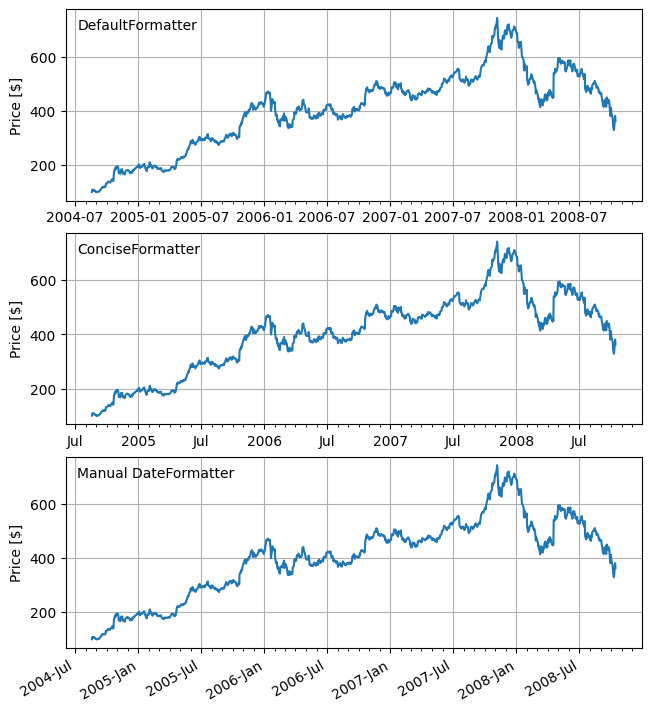

In [8]:
import matplotlib.pyplot as plt

import matplotlib.cbook as cbook
import matplotlib.dates as mdates

# Load a numpy record array from yahoo csv data with fields date, open, high,
# low, close, volume, adj_close from the mpl-data/sample_data directory. The
# record array stores the date as an np.datetime64 with a day unit ('D') in
# the date column.
data = cbook.get_sample_data('goog.npz')['price_data']

fig, axs = plt.subplots(3, 1, figsize=(6.4, 7), layout='constrained')
# common to all three:
for ax in axs:
    ax.plot('date', 'adj_close', data=data)
    # Major ticks every half year, minor ticks every month,
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)
    ax.set_ylabel(r'Price [\$]')

# different formats:
ax = axs[0]
ax.set_title('DefaultFormatter', loc='left', y=0.85, x=0.02, fontsize='medium')

ax = axs[1]
ax.set_title('ConciseFormatter', loc='left', y=0.85, x=0.02, fontsize='medium')
ax.xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

ax = axs[2]
ax.set_title('Manual DateFormatter', loc='left', y=0.85, x=0.02,
             fontsize='medium')
# Text in the x-axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

plt.show()

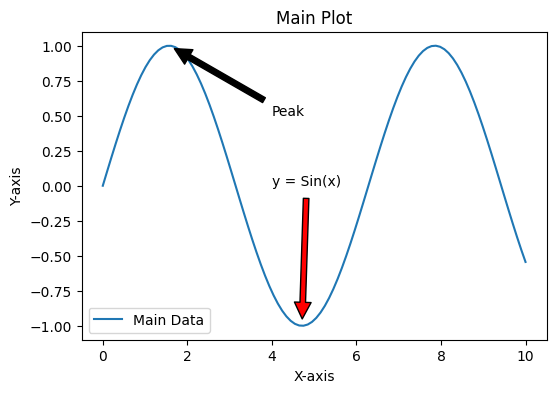

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure
fig, main_ax = plt.subplots(figsize=(6, 4))

# Data for main plot
x_main = np.linspace(0, 10, 100)
y_main = np.sin(x_main)

# Plot data on main axes
main_ax.plot(x_main, y_main, label='Main Data')
main_ax.set_title('Main Plot')
main_ax.set_xlabel('X-axis')
main_ax.set_ylabel('Y-axis')
main_ax.legend()

# Add the first annotation
main_ax.annotate('Peak', xy=(np.pi/2, 1), xytext=(4, 0.5),
                 arrowprops=dict(facecolor='black', shrink=0.05))

# Add the second annotation
main_ax.annotate('y = Sin(x)', xy=(3*np.pi/2, -1), xytext=(4, 0),
                 arrowprops=dict(facecolor='red', shrink=0.05))

# Display the plot
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import cartopy.crs as ccrs
import matplotlib.animation as animation

# Load the netCDF file
file_path = 'data/MERRA2_400.tavg1_2d_lnd_Nx.20240401.nc4'
dataset = nc.Dataset(file_path)
print(dataset)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    History: Original file generated: Mon Apr 29 20:16:24 2024 GMT
    Comment: GMAO filename: d5124_m2_jan10.tavg1_2d_lnd_Nx.20240401.nc4
    Filename: MERRA2_400.tavg1_2d_lnd_Nx.20240401.nc4
    Conventions: CF-1
    Institution: NASA Global Modeling and Assimilation Office
    References: http://gmao.gsfc.nasa.gov
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: 5.12.4
    TemporalRange: 1980-01-01 -> 2016-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: M2T1NXLND
    GranuleID: MERRA2_400.tavg1_2d_lnd_Nx.20240401.nc4
    ProductionDateTime: Original file generated: Mon Apr 29 20:16:24 2024 GMT
    LongName: MERRA2 tavg1_2d_lnd_Nx: 2d,1-Hourly,Time-Averaged,Single-Level,Assimilation,Land Surface Diagnostics
    Title: MERRA2 tavg1_2d_lnd_Nx: 2d,1-Hourly,Time-Averaged,Single-Level,Assimilation,Land Surface Diagnostics
    SouthernmostLatitude: -90.0


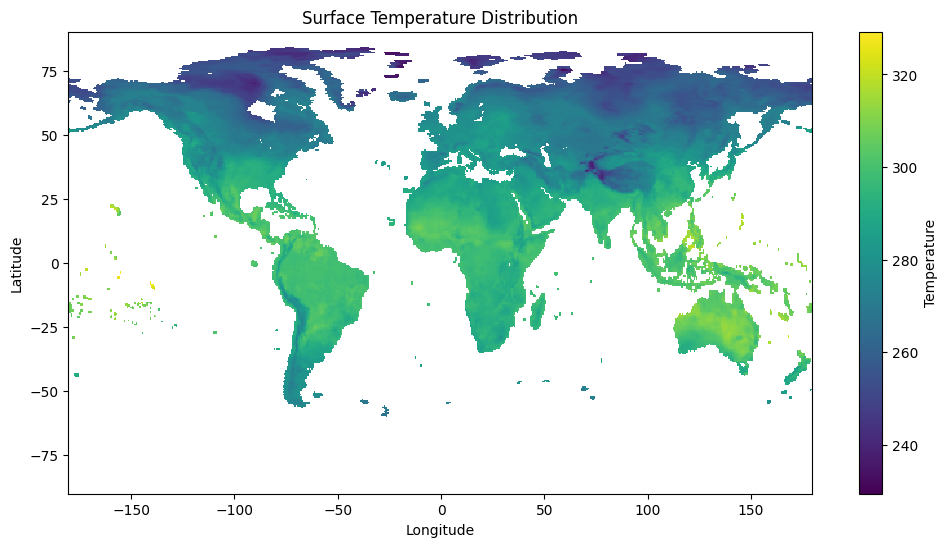

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import cartopy.crs as ccrs
import matplotlib.animation as animation

# Load the netCDF file
file_path = 'data/MERRA2_400.tavg1_2d_lnd_Nx.20240401.nc4'
dataset = nc.Dataset(file_path)

# Extract the variables
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
temps = dataset.variables['TSURF'][0, :, :]  # Assuming the time dimension is the first dimension

# Close the dataset
dataset.close()

# Create a figure
fig, ax = plt.subplots(figsize=(12, 6))

# Create a 2D grid of latitude and longitude
lon_grid, lat_grid = np.meshgrid(lons, lats)

# Plot the temperature data
c = ax.pcolormesh(lon_grid, lat_grid, temps, shading='auto')
fig.colorbar(c, ax=ax, label='Temperature')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Surface Temperature Distribution')

plt.show()

In [ ]:
Excercise 4a) Cartopy coastlines

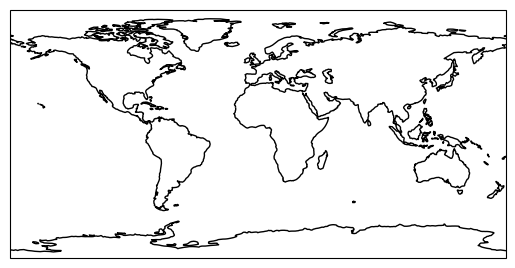

In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.show()

In [ ]:
Exercise 4b) Cartopy features

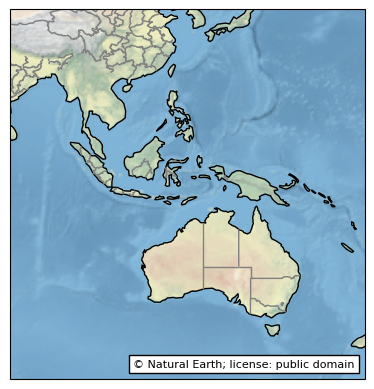

In [9]:

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([80, 170, -45, 30])

# Put a background image on for nice sea rendering.
ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

SOURCE = 'Natural Earth'
LICENSE = 'public domain'

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(states_provinces, edgecolor='gray')

#Add a text annotation for the license information to the
#the bottom right corner.
text = AnchoredText('\u00A9 {}; license: {}'
                        ''.format(SOURCE, LICENSE),
                        loc=4, prop={'size': 8}, frameon=True)
ax.add_artist(text)

plt.show()



In [ ]:
Exercise 4c) Cartopy projections

Try:
- rotating the plot
- changing the projection (https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html)
- changing the colourmap

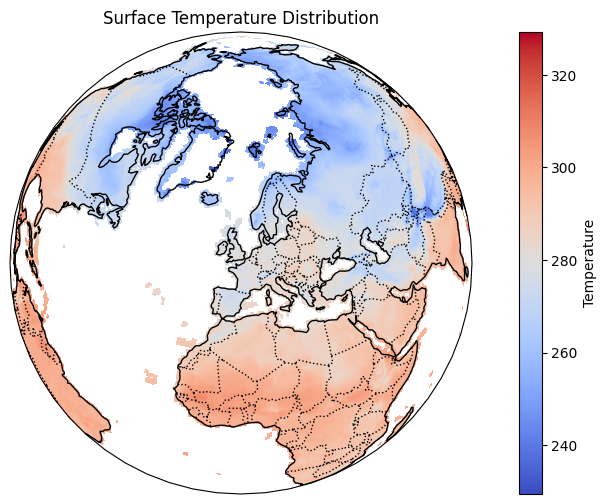

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the netCDF file
file_path = 'data/MERRA2_400.tavg1_2d_lnd_Nx.20240401.nc4'
dataset = nc.Dataset(file_path)

# Extract the variables
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
temps = dataset.variables['TSURF'][0, :, :]  # Assuming the time dimension is the first dimension

# Close the dataset
dataset.close()

# Create a figure
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.Orthographic(central_longitude=0, central_latitude=50)})

# Create a 2D grid of latitude and longitude
lon_grid, lat_grid = np.meshgrid(lons, lats)

# Plot the temperature data
c = ax.pcolormesh(lon_grid, lat_grid, temps, shading='auto', transform=ccrs.PlateCarree(), cmap='coolwarm')
fig.colorbar(c, ax=ax, label='Temperature')

# Add features for better visualization
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)

# Set title
ax.set_title('Surface Temperature Distribution')

plt.show()


In [ ]:
Exercise 5) 

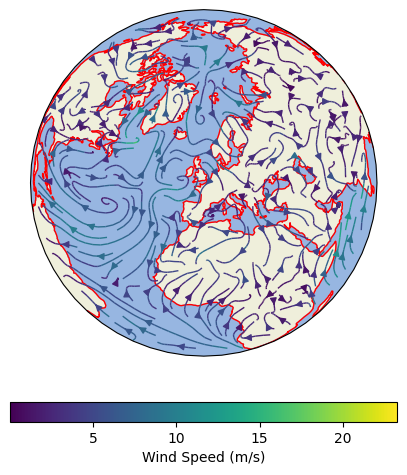

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Load the dataset
dataset = xr.load_dataset("data/test_netcdf.nc", engine="netcdf4")

# Extract the variables
u = dataset.variables['u10'][0, :, :].values  # U-component of wind
v = dataset.variables['v10'][0, :, :].values  # V-component of wind
lats = dataset.variables['latitude'][:].values
lons = dataset.variables['longitude'][:].values

# Create a meshgrid for the latitudes and longitudes
lon2d, lat2d = np.meshgrid(lons, lats)

# Calculate the magnitude of the wind vectors
magnitude = (u ** 2 + v ** 2) ** 0.5

# Normalize the magnitude for coloring
norm = Normalize(vmin=np.min(magnitude), vmax=np.max(magnitude))
cmap = cm.viridis

# Plotting
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0, central_latitude=50))

# Create the streamlines with color mapping based on magnitude
strm = ax.streamplot(lon2d, lat2d, u, v, transform=ccrs.PlateCarree(), color=magnitude, linewidth=1, cmap=cmap, norm=norm, density=1.5)

# Add color to the land and sea
land = cfeature.NaturalEarthFeature(
    'physical', 'land', '110m',
    edgecolor='face',
    facecolor=cfeature.COLORS['land']
)
ax.add_feature(land)

sea = cfeature.NaturalEarthFeature(
    'physical', 'ocean', '110m',
    edgecolor='face',
    facecolor=cfeature.COLORS['water']
)
ax.add_feature(sea)

# Add coastlines
ax.coastlines(color='r', linewidth=1)

# Add a color bar with adjusted size
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(magnitude)
plt.colorbar(sm, ax=ax, orientation='horizontal', label='Wind Speed (m/s)', shrink=0.5, pad=0.1)

plt.show()


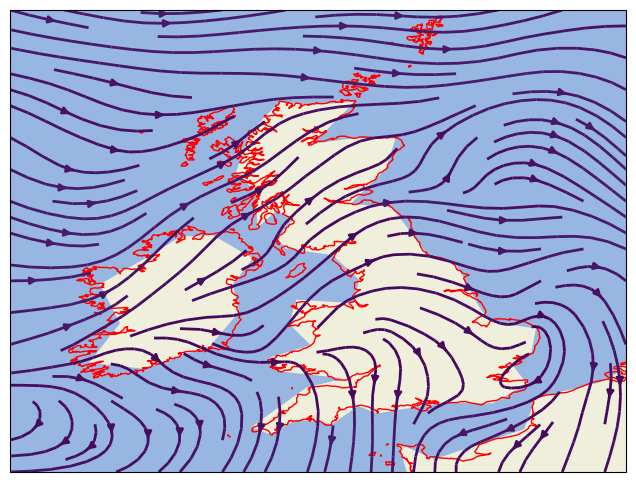

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import matplotlib.animation as animation
from IPython import display

# Load the dataset
dataset = xr.load_dataset("data/test_netcdf.nc", engine="netcdf4")

# Define the latitude and longitude bounds for the UK and Ireland
lat_bounds = [49, 61]
lon_bounds = [-12, 4]

# Extract latitude and longitude arrays
lats = dataset.variables['latitude'][:].values
lons = dataset.variables['longitude'][:].values

# Convert longitudes from [0, 360] to [-180, 180]
lons = np.where(lons > 180, lons - 360, lons)

# Find the indices that correspond to the desired lat/lon bounds
lat_indices = np.where((lats >= lat_bounds[0]) & (lats <= lat_bounds[1]))[0]
lon_indices = np.where((lons >= lon_bounds[0]) & (lons <= lon_bounds[1]))[0]

# Slice the data to include only these bounds
u = dataset.variables['u10'][:, lat_indices, :][:, :, lon_indices].values
v = dataset.variables['v10'][:, lat_indices, :][:, :, lon_indices].values
lats = lats[lat_indices]
lons = lons[lon_indices]

# Set up the plot
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-12, 4, 49, 61], crs=ccrs.PlateCarree())  # Focus on UK and Ireland

# Add color to the land and sea
land = cfeature.NaturalEarthFeature(
    'physical', 'land', '110m',
    edgecolor='face',
    facecolor=cfeature.COLORS['land']
)
ax.add_feature(land)

sea = cfeature.NaturalEarthFeature(
    'physical', 'ocean', '110m',
    edgecolor='face',
    facecolor=cfeature.COLORS['water']
)
ax.add_feature(sea)

# Add coastlines
ax.coastlines(color='r', linewidth=1)

# Create a meshgrid for the latitudes and longitudes
lon2d, lat2d = np.meshgrid(lons, lats)

# Normalize the magnitude for coloring
norm = Normalize(vmin=np.min(u**2 + v**2), vmax=np.max(u**2 + v**2))
cmap = cm.viridis

# Function to update the streamline plot
def update(frame):
    ax.clear()  # Clear the previous streamlines
    ax.set_extent([-12, 4, 49, 61], crs=ccrs.PlateCarree())  # Reset the extent
    ax.add_feature(land)
    ax.add_feature(sea)
    ax.coastlines(color='r', linewidth=1)

    magnitude = (u[frame, :, :] ** 2 + v[frame, :, :] ** 2) ** 0.5
    strm = ax.streamplot(lon2d, lat2d, u[frame, :, :], v[frame, :, :], 
                         transform=ccrs.PlateCarree(), color=magnitude, linewidth=2, cmap=cmap, norm=norm)
    return strm

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(dataset.variables['time']), blit=False, interval=1000)

# Assign the animation to a variable to prevent it from being deleted
anim = ani

# converting to an html5 video 
video = anim.to_html5_video() 
  
# embedding for the video 
html = display.HTML(video) 
  
# draw the animation 
display.display(html) 
